#### To use the Random Forest Survival analysis you will need to use the Pysurvival package.
To install this package please follow the instructions from this site https://square.github.io/pysurvival/installation.html
##### For MacOS users:
You will need to add two more lines besides the recommended 2 as shown below:
###### Note: please check which version of gcc do you have as it might be different from 9.3.0.



### To use the Random Forest Survival analysis we need to load the data and remove the colinear features

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set()
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [3]:
!pip install xlrd

  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)


You should consider upgrading via the 'c:\users\jacob\documents\simpsonlab\endometrial project\.venv\scripts\python.exe -m pip install --upgrade pip' command.


### using the panda reader import your file where the data is contained

In [4]:
clinical_data=pd.read_excel('WithoutMRNEndometrial_TextureFeatures_09182019.xlsx')
other_data=pd.read_excel('1.20.20 DeIdentified_HG_CT_JJM_AS_Clinical Variables_Final.xlsx')

other_data

,De-Identified Study ID,ExamStatus,Tumor Visible,CT_Make,CT_ST,CT_kVp,CT_mA,CT_Pitch,Age at Dx,Race,...,Time to Recurrence (months),Pt recurred prior to 18 months (0=no 1= yes),Deceased (y/n),Overall Survival (Months),Reason for excluxion,Comments,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,1,F,Y,Light Speed 16,5.0,120.0,360.0,1.375,69,1.0,...,72.866667,NaN,0.0,72.866667,NaN,NaN,NaN,NaN,NaN,NaN
1,2,F,Y,Light Speed VCT,5.0,120.0,219.0,0.984,71,2.0,...,57.733333,NaN,0.0,57.733333,NaN,NaN,NaN,NaN,NaN,NaN
2,3,F,Y,Light Speed 16,5.0,120.0,380.0,1.375,55,0.0,...,69.100000,NaN,0.0,69.100000,NaN,NaN,NaN,NaN,NaN,NaN
3,4,F,Y,Discovery CT750,5.0,120.0,227.0,0.984,61,0.0,...,39.233333,NaN,0.0,39.233333,NaN,NaN,NaN,NaN,NaN,NaN
4,5,F,Y,Light Speed 16,5.0,120.0,440.0,0.938,79,NaN,...,NaN,NaN,NaN,NaN,cannot see the tumor,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,153,F,Y,Light Speed VCT,5.0,120.0,309.0,0.984,64,0.0,...,22.400000,NaN,0.0,22.400000,NaN,NaN,NaN,NaN,NaN,NaN
153,154,F,Y,Revolution GSI,5.0,120.0,219.0,0.984,73,2.0,...,8.266667,1.0,0.0,24.933333,NaN,NaN,NaN,NaN,NaN,NaN
154,155,F,Y,Light Speed VCT,5.0,120.0,219.0,0.984,70,2.0,...,18.666667,NaN,0.0,18.666667,NaN,NaN,NaN,NaN,NaN,NaN
155,156,F,Y,Discovery CT750,5.0,120.0,379.0,0.984,68,0.0,...,20.300000,NaN,0.0,20.300000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# it is always good idea to have some idea how your data looks like
clinical_data

,De identified Study ID,GLCM1,GLCM2,GLCM3,GLCM4,GLCM5,GLCM6,GLCM7,GLCM8,GLCM9,...,ACM2_10,ACM2_11,ACM2_12,ACM2_13,ACM2_14,ACM2_15,ACM2_16,ACM2_17,ACM2_18,ACM2_19
0,1,0.026256,4.333412,0.449950,3.917603,0.454955,18.285737,11.337002,3.752016,5.716646,...,8.721173,2.940614,-0.148826,0.818354,0.593029,15.073033,1589.851794,25079.738554,4.739398,0.986655
1,2,0.050280,2.314190,0.484697,2.424970,0.537827,17.646685,7.385692,3.347634,4.862031,...,13.201337,3.010564,-0.199530,0.884071,0.685592,22.045709,1375.243100,22262.287867,4.737088,0.986307
2,3,0.023361,5.228412,0.398057,4.528518,0.411689,14.291180,12.885660,3.826931,5.966786,...,15.510645,3.415731,-0.087748,0.692718,0.457665,29.858372,1154.498568,18661.617962,5.744309,0.992419
3,4,0.039554,1.855517,0.711033,3.394799,0.580393,17.935818,11.723678,3.712137,5.129299,...,10.880541,2.965569,-0.170623,0.851561,0.672977,17.817663,1262.648674,20244.421621,4.899353,0.986331
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,153,0.030961,3.329703,0.451058,3.087595,0.476773,18.400621,9.020677,3.600778,5.457496,...,13.744894,3.237901,-0.117999,0.762980,0.544010,24.375379,1216.030259,19845.283280,5.463958,0.990320
153,154,0.029211,3.481393,0.501623,3.940367,0.474784,12.609427,12.280073,3.721832,5.599860,...,12.915139,3.192640,-0.128645,0.762071,0.644287,22.532088,1229.523023,18864.092413,2.946259,0.955650
154,155,0.035093,2.847245,0.527364,3.044318,0.511396,16.492182,9.330027,3.623143,5.368373,...,17.301398,3.374493,-0.104464,0.734452,0.527287,31.631916,1131.817162,19269.673532,5.463295,0.991081
155,156,0.033468,1.997960,0.713680,3.649665,0.556493,16.244867,12.600701,3.835563,5.356900,...,15.174270,3.351991,-0.091512,0.711624,0.492463,27.887957,1324.578843,21823.254109,5.910660,0.992627


In [6]:
# in this data sets certain rows are excluded so we have to remove them 
data=clinical_data.drop([4, 7, 11, 13, 23, 25, 29, 36, 41, 47, 61, 62, 63, 68, 76, 88, 94, 96, 
                          108, 133, 135, 142]).reset_index(drop=True)
o_data=other_data.drop([4,7, 11, 13, 23, 25, 29, 36, 41, 47, 61, 62, 63, 68, 76, 88, 94, 96, 
                          108, 133, 135, 142]).reset_index(drop=True)
o_data
data.columns

Index(['De identified Study ID', 'GLCM1', 'GLCM2', 'GLCM3', 'GLCM4', 'GLCM5',
       'GLCM6', 'GLCM7', 'GLCM8', 'GLCM9',
       ...
       'ACM2_10', 'ACM2_11', 'ACM2_12', 'ACM2_13', 'ACM2_14', 'ACM2_15',
       'ACM2_16', 'ACM2_17', 'ACM2_18', 'ACM2_19'],
      dtype='object', length=256)

In [7]:
data['time column']=o_data['Time to Recurrence (months)']
data['event column']=o_data['Recurrence (y/n)']

In [8]:
data1=data.drop(columns=['De identified Study ID'])
data1.to_csv('for_survival.csv')

In [9]:
lola=data1.iloc[:,0:255]
lola.columns

Index(['GLCM1', 'GLCM2', 'GLCM3', 'GLCM4', 'GLCM5', 'GLCM6', 'GLCM7', 'GLCM8',
       'GLCM9', 'GLCM10',
       ...
       'ACM2_10', 'ACM2_11', 'ACM2_12', 'ACM2_13', 'ACM2_14', 'ACM2_15',
       'ACM2_16', 'ACM2_17', 'ACM2_18', 'ACM2_19'],
      dtype='object', length=255)

In [10]:
time_column='time column'
event_column='event column'
features=np.setdiff1d(data1.columns, [time_column, event_column]).tolist()
len(features)

255

### We will be using Variance Inflation Factor to remove the colinear features
In the RFS analysis it is very important to remove the colinear features

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=20.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [12]:
#VIF of 10 means that all the features with R^2 above 0.9 will removed
X=lola
calculate_vif_(X, 10)

dropping 'GLCM1' at index: 0
dropping 'GLCM2' at index: 0
dropping 'GLCM3' at index: 0
dropping 'GLCM4' at index: 0
dropping 'GLCM5' at index: 0
dropping 'GLCM6' at index: 0
dropping 'GLCM7' at index: 0
dropping 'GLCM8' at index: 0
dropping 'GLCM9' at index: 0
dropping 'GLCM10' at index: 0
dropping 'GLCM11' at index: 0
dropping 'GLCM12' at index: 0
dropping 'GLCM13' at index: 0
dropping 'GLCM14' at index: 0
dropping 'GLCM15' at index: 0
dropping 'GLCM16' at index: 0
dropping 'GLCM17' at index: 0
dropping 'GLCM18' at index: 0
dropping 'GLCM19' at index: 0
dropping 'RLM1' at index: 0
dropping 'RLM2' at index: 0
dropping 'RLM3' at index: 0
dropping 'RLM4' at index: 0
dropping 'RLM5' at index: 0
dropping 'RLM6' at index: 0
dropping 'RLM7' at index: 0
dropping 'RLM8' at index: 0
dropping 'RLM9' at index: 0
dropping 'RLM10' at index: 0
dropping 'RLM11' at index: 0
dropping 'IH1' at index: 0
dropping 'IH2' at index: 0
dropping 'IH3' at index: 0
dropping 'IH4' at index: 0
dropping 'IH5' at ind

,LBP94,LBP101,LBP106,LBP107,LBP108,LBP112,LBP116,LBP118,LBP119,LBP120,FD27,FD51,FD54,ACM1_12
0,0.008640,0.013356,0.004859,0.004859,0.004132,0.000000,0.010616,0.007653,0.002066,0.000000,9.000000,0.079923,0.068974,-0.072218
1,0.007668,0.048193,0.000000,0.004474,0.002237,0.002237,0.022017,0.025663,0.002237,0.002268,3.333333,0.128958,0.112149,-0.128768
2,0.021092,0.012521,0.004832,0.004832,0.002381,0.002381,0.010747,0.013208,0.000456,0.000000,15.250000,0.056418,0.044223,-0.044774
3,0.016198,0.010369,0.000418,0.000418,0.002021,0.001185,0.009453,0.017735,0.000000,0.001094,15.750000,0.141440,0.121297,-0.076017
4,0.009955,0.005240,0.002404,0.002404,0.000000,0.000000,0.014629,0.011696,0.004484,0.000000,8.000000,0.157050,0.145854,-0.071011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.022039,0.010716,0.003116,0.003159,0.003084,0.002702,0.008869,0.014814,0.000392,0.000713,24.500000,0.087100,0.067616,-0.051001
131,0.012268,0.011711,0.001980,0.002713,0.001017,0.000758,0.006853,0.014726,0.001896,0.000630,25.888889,0.055196,0.037529,-0.155972
132,0.015814,0.010354,0.001611,0.003510,0.000773,0.000773,0.008804,0.009672,0.002337,0.000396,31.714286,0.100156,0.067450,-0.041698
133,0.019432,0.016423,0.002315,0.002550,0.001315,0.000583,0.009172,0.014753,0.000963,0.000259,59.888889,0.112976,0.065836,-0.032100


In [13]:
#creating a new dataframe with colinear features removed
data2=data1.loc[:, ['LBP94', 'LBP101', 'LBP106', 'LBP107', 'LBP108', 'LBP112', 'LBP116',
       'LBP118', 'LBP119', 'LBP120', 'FD27', 'FD51', 'FD54', 'ACM1_12', 'time column', 'event column']]
data2

,LBP94,LBP101,LBP106,LBP107,LBP108,LBP112,LBP116,LBP118,LBP119,LBP120,FD27,FD51,FD54,ACM1_12,time column,event column
0,0.008640,0.013356,0.004859,0.004859,0.004132,0.000000,0.010616,0.007653,0.002066,0.000000,9.000000,0.079923,0.068974,-0.072218,72.866667,0.0
1,0.007668,0.048193,0.000000,0.004474,0.002237,0.002237,0.022017,0.025663,0.002237,0.002268,3.333333,0.128958,0.112149,-0.128768,57.733333,0.0
2,0.021092,0.012521,0.004832,0.004832,0.002381,0.002381,0.010747,0.013208,0.000456,0.000000,15.250000,0.056418,0.044223,-0.044774,69.100000,0.0
3,0.016198,0.010369,0.000418,0.000418,0.002021,0.001185,0.009453,0.017735,0.000000,0.001094,15.750000,0.141440,0.121297,-0.076017,39.233333,0.0
4,0.009955,0.005240,0.002404,0.002404,0.000000,0.000000,0.014629,0.011696,0.004484,0.000000,8.000000,0.157050,0.145854,-0.071011,20.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.022039,0.010716,0.003116,0.003159,0.003084,0.002702,0.008869,0.014814,0.000392,0.000713,24.500000,0.087100,0.067616,-0.051001,22.400000,0.0
131,0.012268,0.011711,0.001980,0.002713,0.001017,0.000758,0.006853,0.014726,0.001896,0.000630,25.888889,0.055196,0.037529,-0.155972,8.266667,1.0
132,0.015814,0.010354,0.001611,0.003510,0.000773,0.000773,0.008804,0.009672,0.002337,0.000396,31.714286,0.100156,0.067450,-0.041698,18.666667,0.0
133,0.019432,0.016423,0.002315,0.002550,0.001315,0.000583,0.009172,0.014753,0.000963,0.000259,59.888889,0.112976,0.065836,-0.032100,20.300000,0.0


In [14]:
#create a dataframe with time and event columns
time_column='time column'
event_column='event column'
features=np.setdiff1d(data2.columns, [time_column, event_column]).tolist()
len(features)
features
data2

,LBP94,LBP101,LBP106,LBP107,LBP108,LBP112,LBP116,LBP118,LBP119,LBP120,FD27,FD51,FD54,ACM1_12,time column,event column
0,0.008640,0.013356,0.004859,0.004859,0.004132,0.000000,0.010616,0.007653,0.002066,0.000000,9.000000,0.079923,0.068974,-0.072218,72.866667,0.0
1,0.007668,0.048193,0.000000,0.004474,0.002237,0.002237,0.022017,0.025663,0.002237,0.002268,3.333333,0.128958,0.112149,-0.128768,57.733333,0.0
2,0.021092,0.012521,0.004832,0.004832,0.002381,0.002381,0.010747,0.013208,0.000456,0.000000,15.250000,0.056418,0.044223,-0.044774,69.100000,0.0
3,0.016198,0.010369,0.000418,0.000418,0.002021,0.001185,0.009453,0.017735,0.000000,0.001094,15.750000,0.141440,0.121297,-0.076017,39.233333,0.0
4,0.009955,0.005240,0.002404,0.002404,0.000000,0.000000,0.014629,0.011696,0.004484,0.000000,8.000000,0.157050,0.145854,-0.071011,20.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.022039,0.010716,0.003116,0.003159,0.003084,0.002702,0.008869,0.014814,0.000392,0.000713,24.500000,0.087100,0.067616,-0.051001,22.400000,0.0
131,0.012268,0.011711,0.001980,0.002713,0.001017,0.000758,0.006853,0.014726,0.001896,0.000630,25.888889,0.055196,0.037529,-0.155972,8.266667,1.0
132,0.015814,0.010354,0.001611,0.003510,0.000773,0.000773,0.008804,0.009672,0.002337,0.000396,31.714286,0.100156,0.067450,-0.041698,18.666667,0.0
133,0.019432,0.016423,0.002315,0.002550,0.001315,0.000583,0.009172,0.014753,0.000963,0.000259,59.888889,0.112976,0.065836,-0.032100,20.300000,0.0


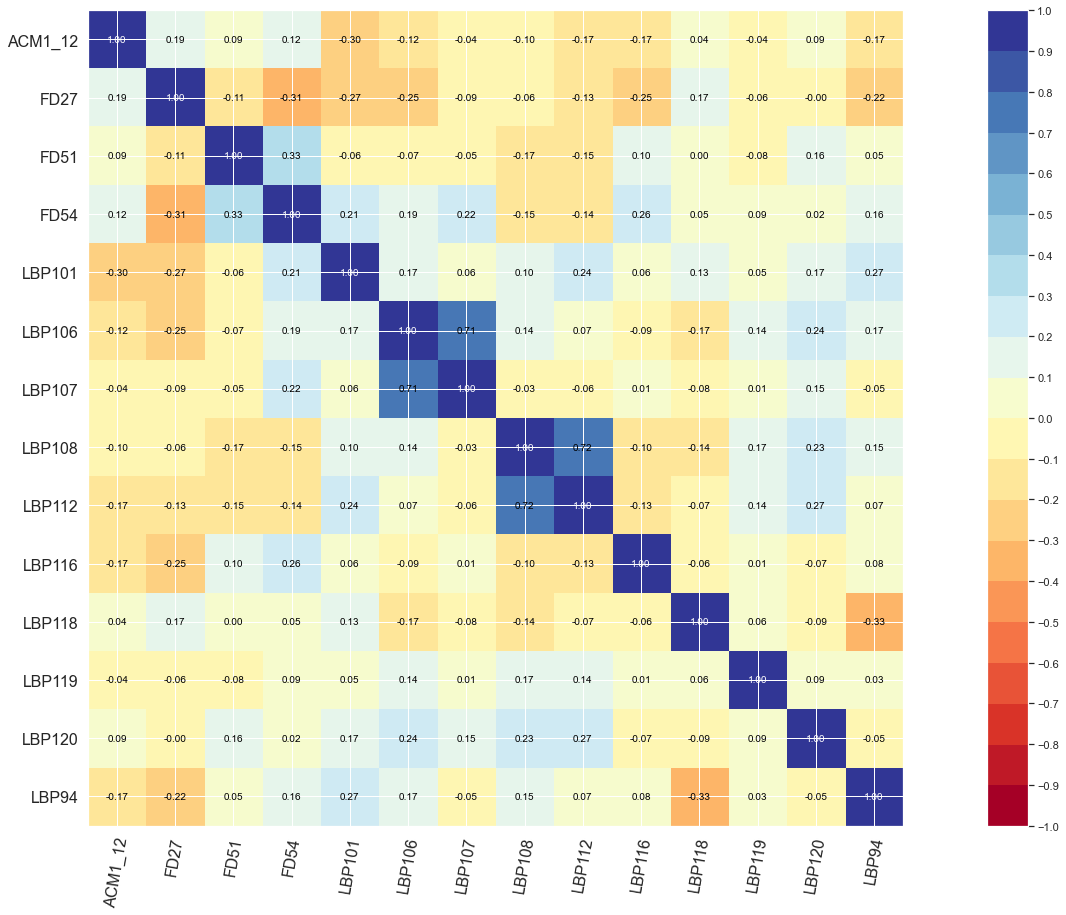

In [15]:
#visualize the correlation matrix
from pysurvival.utils.display import correlation_matrix
correlation_matrix(data2[features], figure_size=(30,15), text_fontsize=10)

#### Now we are ready to analyze our data 
 we need to define our input (X), time (T) and event (E) columns


In [16]:
# Creating the X, T and E inputs
X = data2[features]

newX=np.setdiff1d(data2.columns, [ event_column]).tolist()
X=data2[newX]
E=data2['event column']

### Now we are ready to perform the random forest survival analysis
#### In this example we are using the 10 Stratified Kfold and and evaluating the performance of each run by 
#### evaluating the concordance and plotting the predicted survival curve and error


 1 of kfold 10
C-index: 0.76


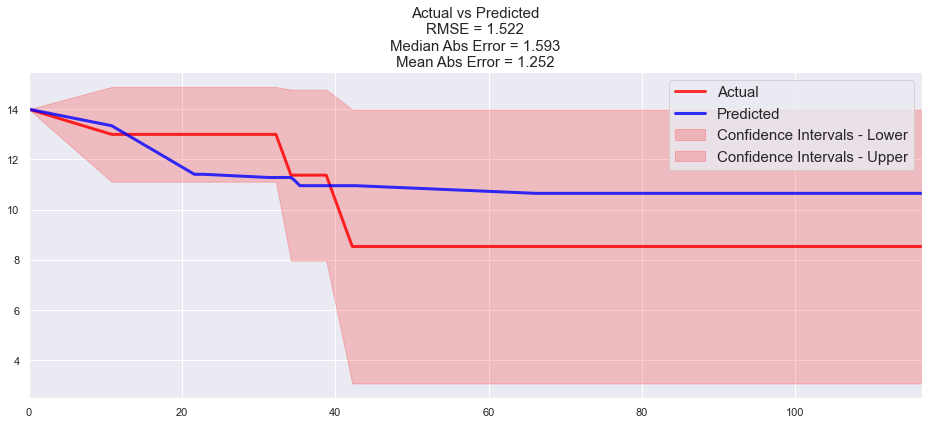

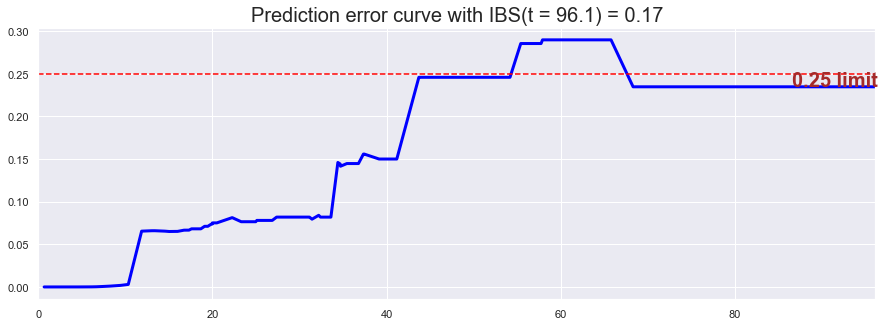

IBS: 0.17

 2 of kfold 10
C-index: 0.57


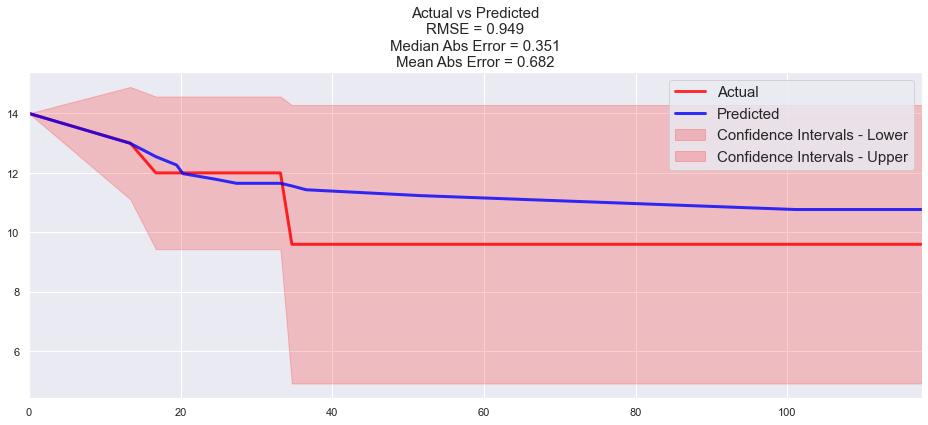

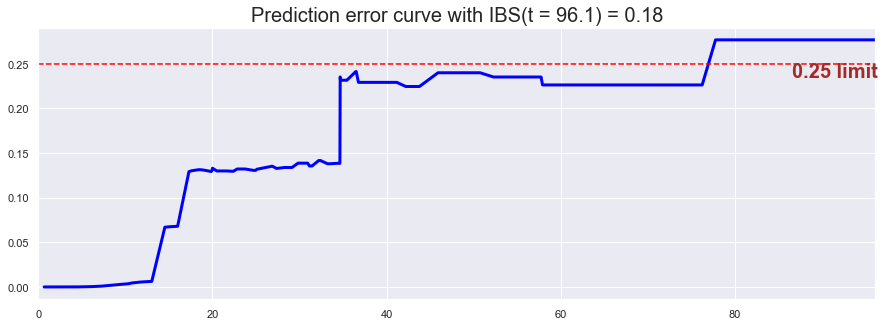

IBS: 0.18

 3 of kfold 10
C-index: 0.71


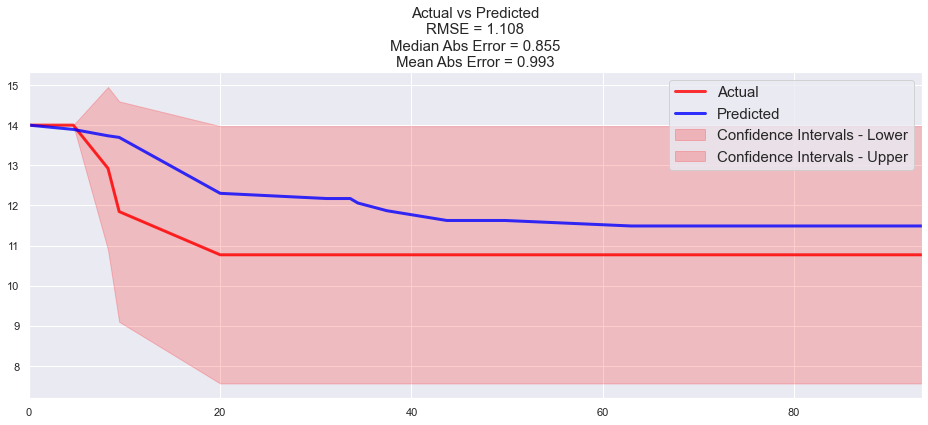

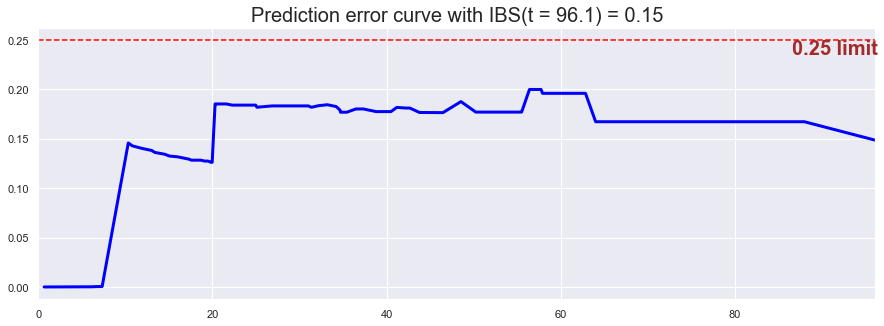

IBS: 0.15

 4 of kfold 10
C-index: 0.74


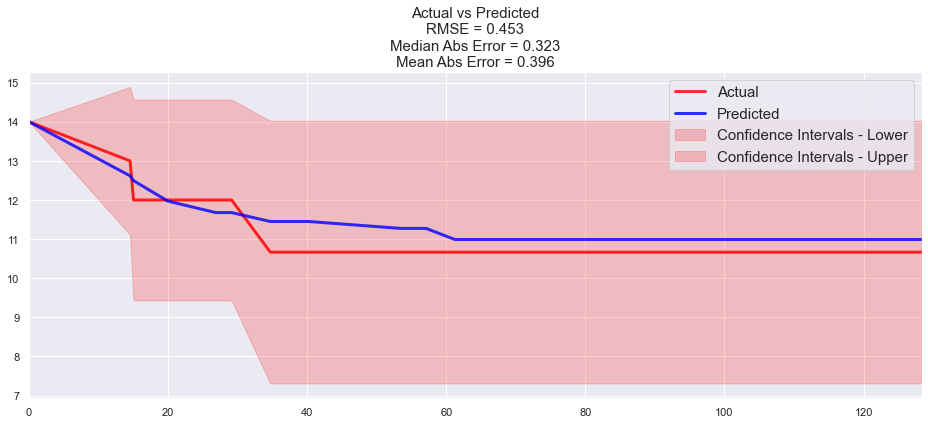

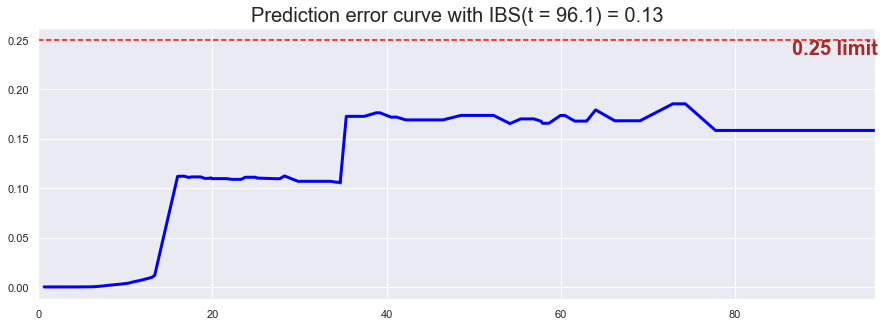

IBS: 0.13

 5 of kfold 10
C-index: 0.62


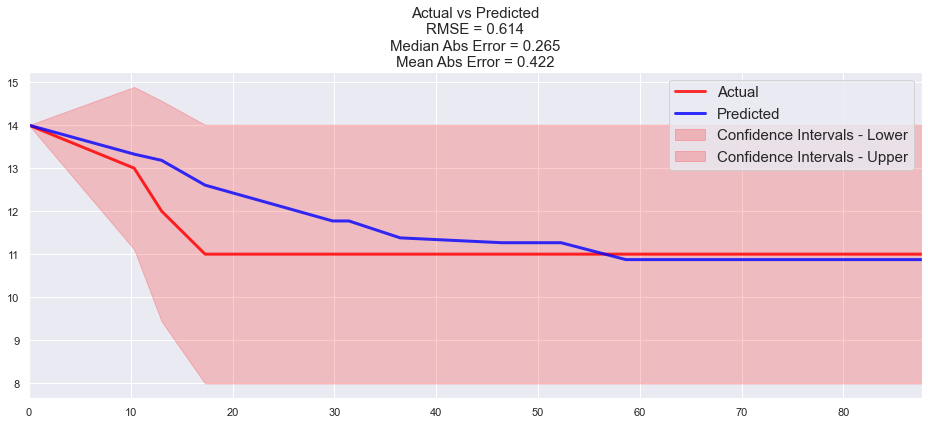

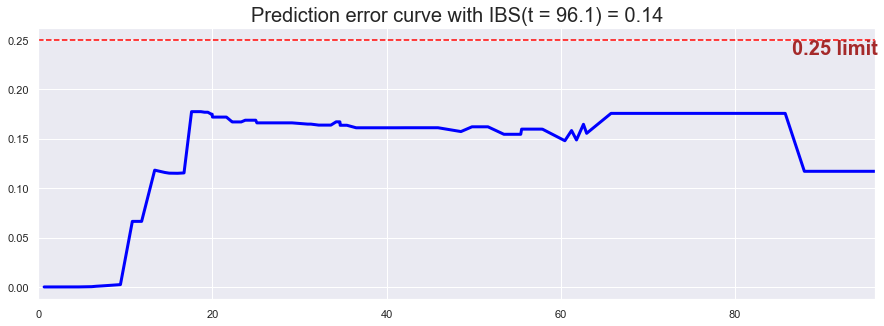

IBS: 0.14

 6 of kfold 10
C-index: 0.76


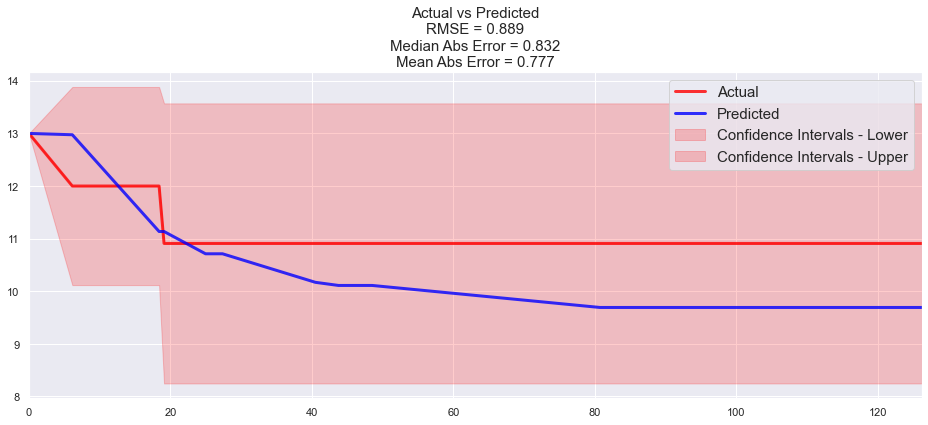

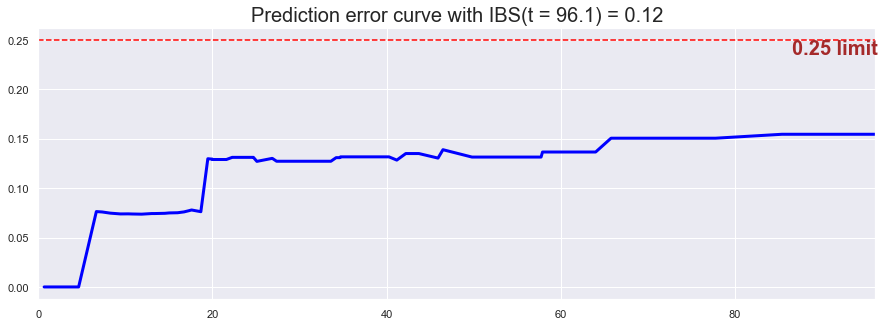

IBS: 0.12

 7 of kfold 10
C-index: 0.50


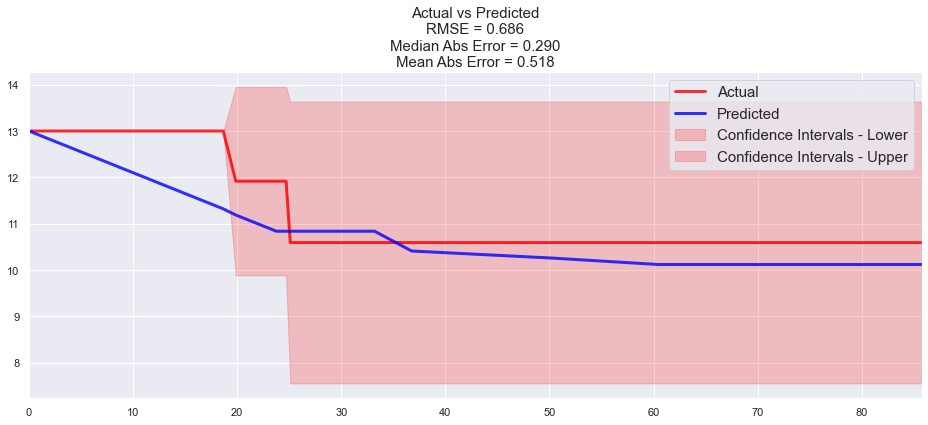

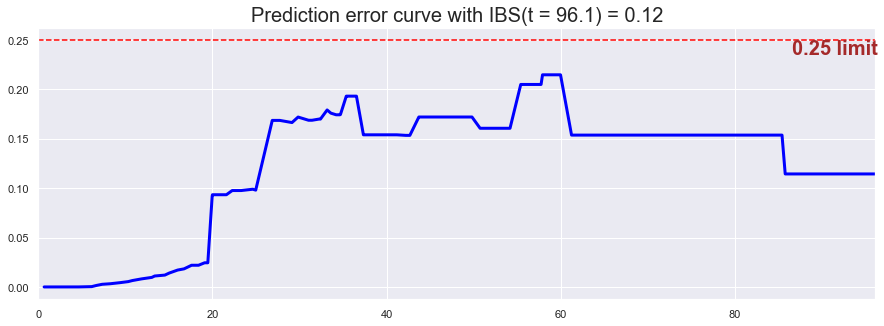

IBS: 0.12

 8 of kfold 10
C-index: 0.52


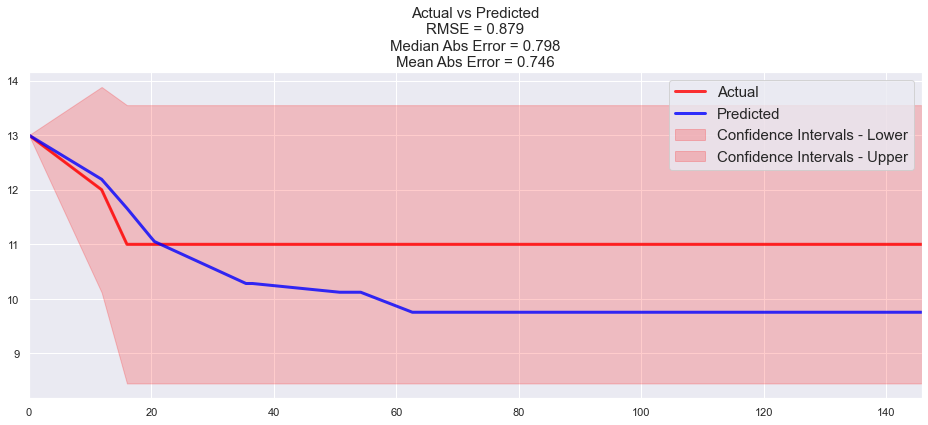

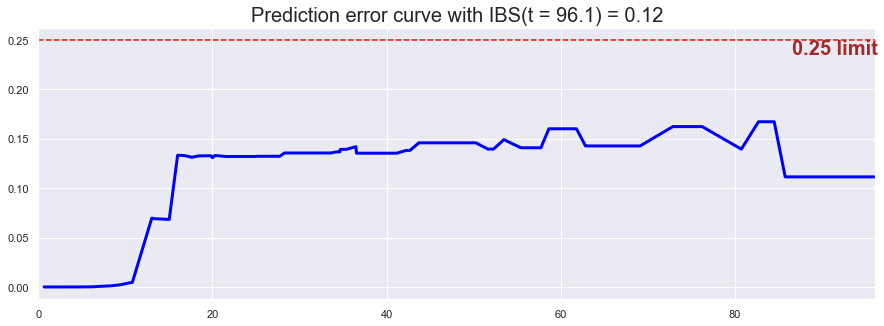

IBS: 0.12

 9 of kfold 10
C-index: 0.67


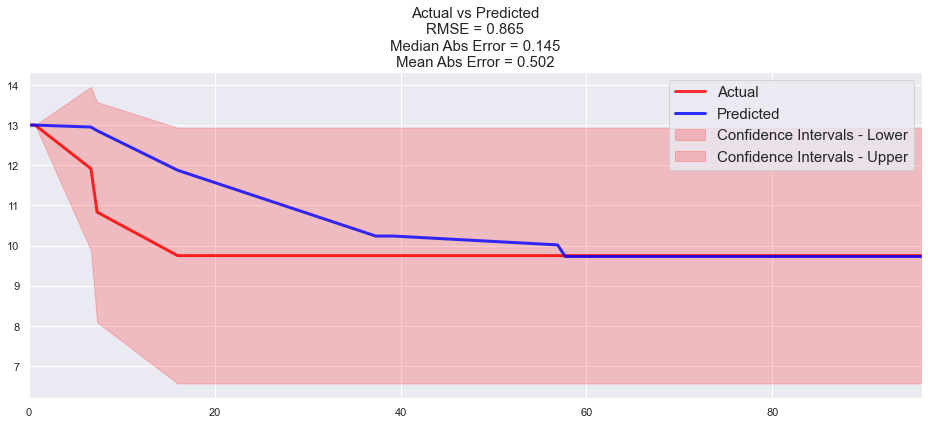

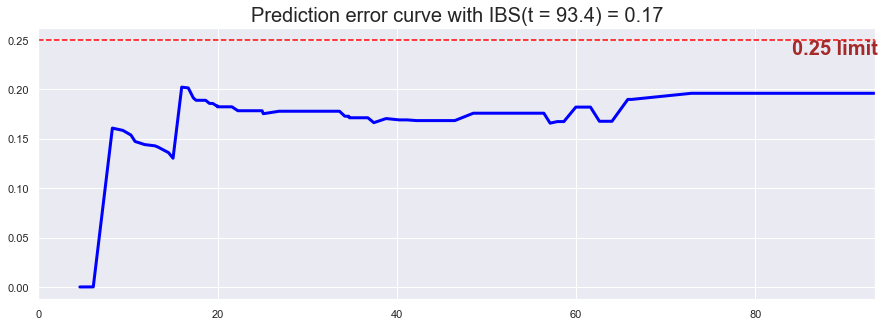

IBS: 0.17

 10 of kfold 10
C-index: 0.57


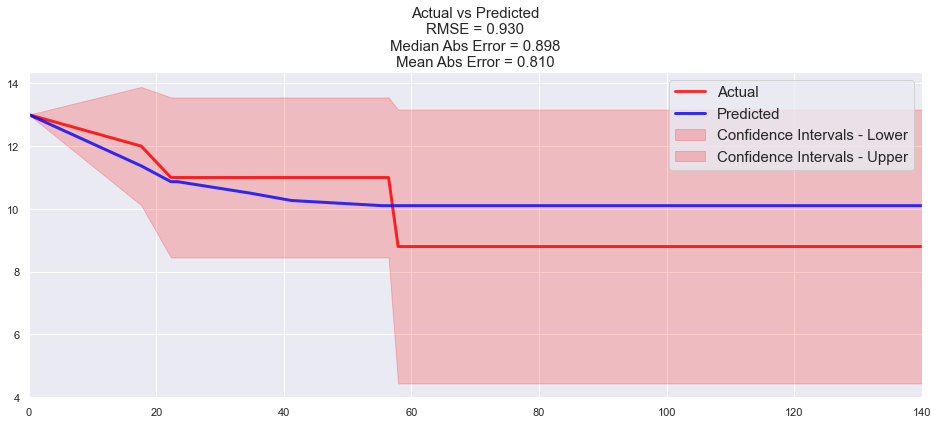

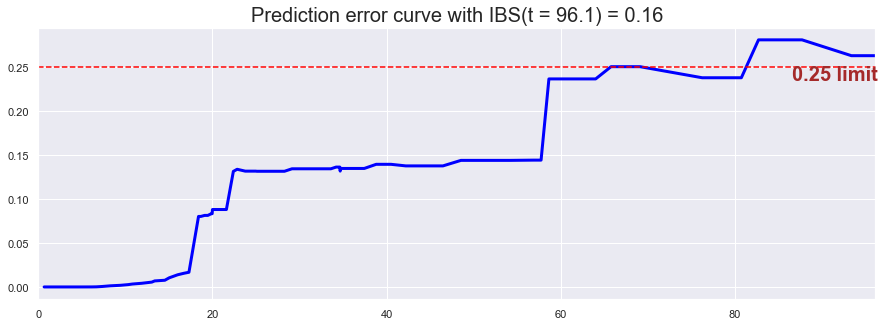

IBS: 0.16


In [17]:
#the random tree variables need to be fine tuned using loops because 
#the grid search CV is not compatible with the PySurvival package

from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import compare_to_actual
from pysurvival.utils.display import integrated_brier_score
i=1
kf=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,E):
    print('\n {} of kfold {}'.format(i,kf.n_splits)) 
    X1_train, X1_test=X.loc[train_index], X.loc[test_index]
    X_train, X_test=X1_train[features], X1_test[features]
    T_train, T_test=X1_train['time column'].values, X1_test['time column'].values
    E_train, E_test=E.loc[train_index].values, E.loc[test_index].values
    xst = RandomSurvivalForestModel(num_trees=10) 
    xst.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = 1,
        min_node_size = 2, num_threads = -1, 
        sample_size_pct = 0.63, importance_mode = 'normalized_permutation',
        seed = None, save_memory=False )
    c_index = concordance_index(xst, X_test, T_test, E_test)
    print('C-index: {:.2f}'.format(c_index))
    results = compare_to_actual(xst, X_test, T_test, E_test, is_at_risk = True,  figure_size=(16, 6), 
                                metrics = ['rmse', 'mean', 'median'])
    ibs = integrated_brier_score(xst, X_test, T_test, E_test, t_max=100, figure_size=(15,5))
    print('IBS: {:.2f}'.format(ibs))
    i=i+1
   
    

### the importance table allows you to identify the main contributing features

In [18]:
xst.variable_importance_table.head(20)
#the results indicate that we only had 3 variables which were important features

,feature,importance,pct_importance
0,LBP94,1.852487,0.286124
1,LBP119,1.442362,0.222778
2,FD54,1.071392,0.165481
3,FD51,1.054093,0.162809
4,FD27,1.054093,0.162809
5,LBP101,0.000000,0.000000
6,LBP106,0.000000,0.000000
7,LBP107,0.000000,0.000000
8,LBP108,0.000000,0.000000
9,LBP112,0.000000,0.000000


In [22]:

data3=data2.loc[:, ['LBP94', 'LBP116',
       'FD51', 'time column', 'event column']]
data3

,LBP94,LBP116,FD51,time column,event column
0,0.008640,0.010616,0.079923,72.866667,0.0
1,0.007668,0.022017,0.128958,57.733333,0.0
2,0.021092,0.010747,0.056418,69.100000,0.0
3,0.016198,0.009453,0.141440,39.233333,0.0
4,0.009955,0.014629,0.157050,20.000000,1.0
...,...,...,...,...,...
130,0.022039,0.008869,0.087100,22.400000,0.0
131,0.012268,0.006853,0.055196,8.266667,1.0
132,0.015814,0.008804,0.100156,18.666667,0.0
133,0.019432,0.009172,0.112976,20.300000,0.0


In [23]:
# Creating the X, T and E inputs
Xnew = data3[['LBP94', 'LBP116','FD51', 'time column']]
features2=['LBP94', 'LBP116','FD51']

Xnew[features2]
Enew=data3['event column']
Enew
Xnew['time column']

0      72.866667
1      57.733333
2      69.100000
3      39.233333
4      20.000000
         ...    
130    22.400000
131     8.266667
132    18.666667
133    20.300000
134    19.966667
Name: time column, Length: 135, dtype: float64


 1 of kfold 10
C-index: 0.78


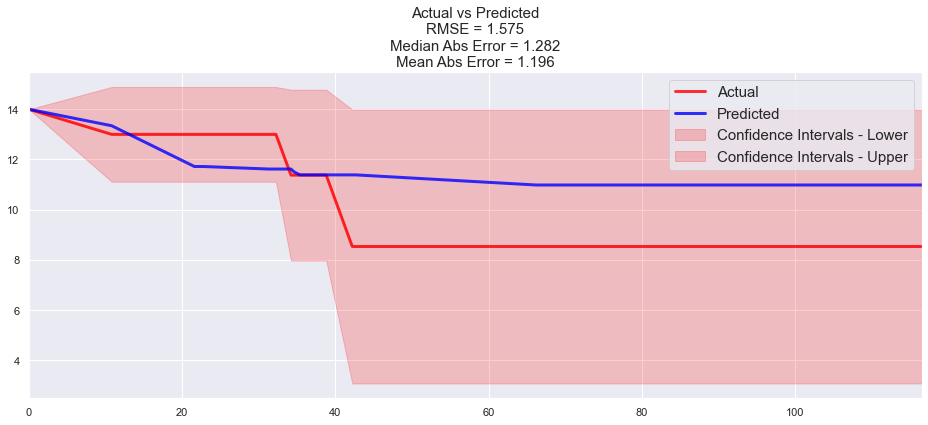

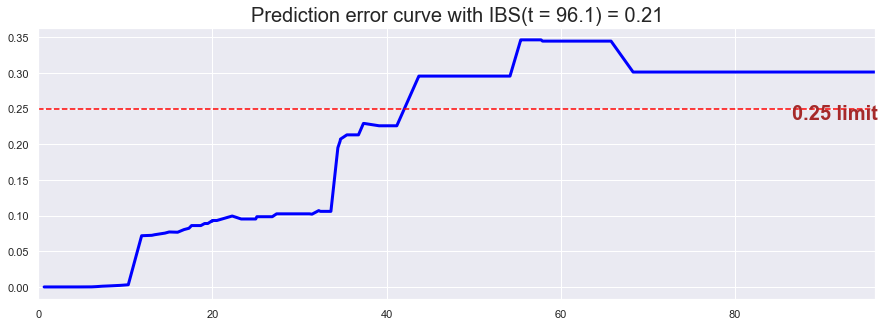

IBS: 0.21

 2 of kfold 10
C-index: 0.71


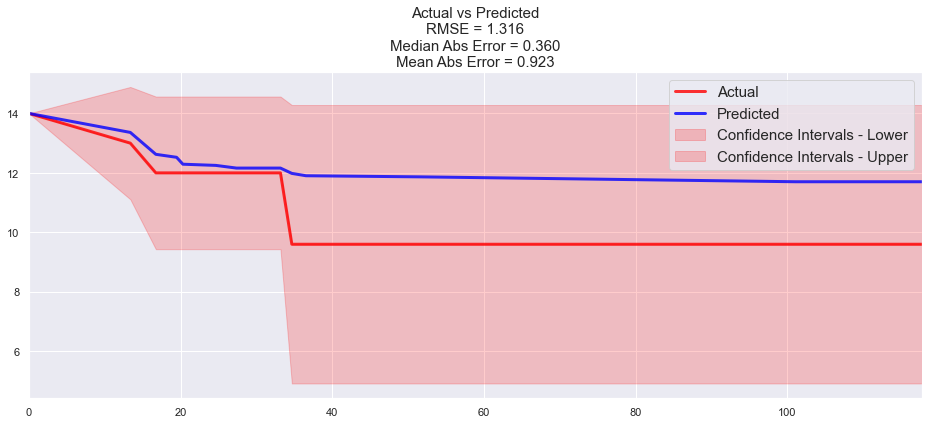

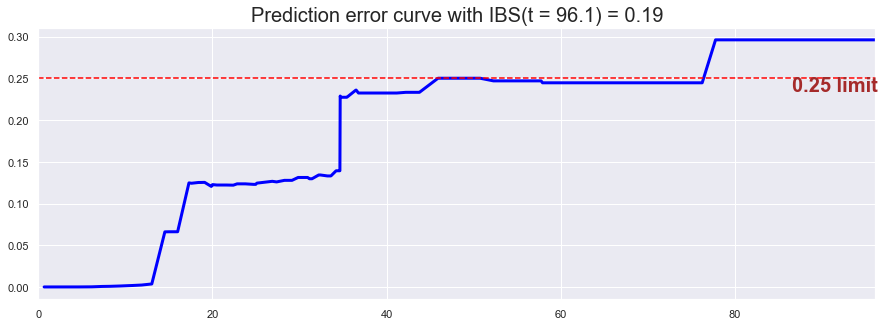

IBS: 0.19

 3 of kfold 10
C-index: 0.52


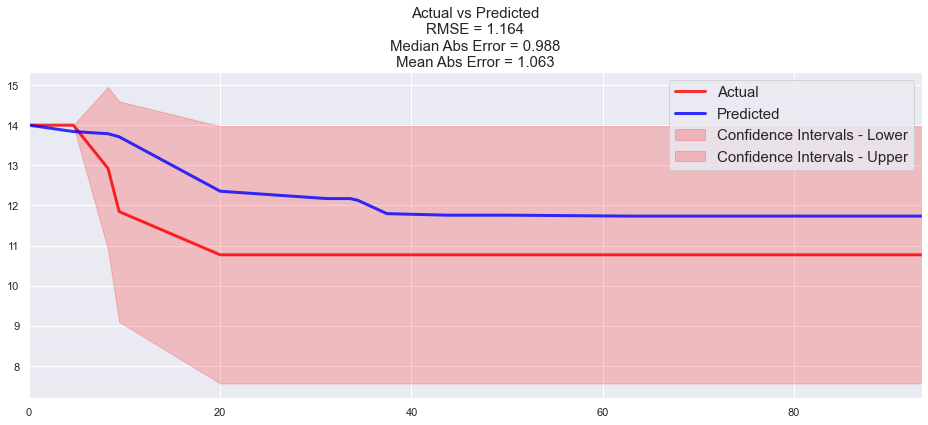

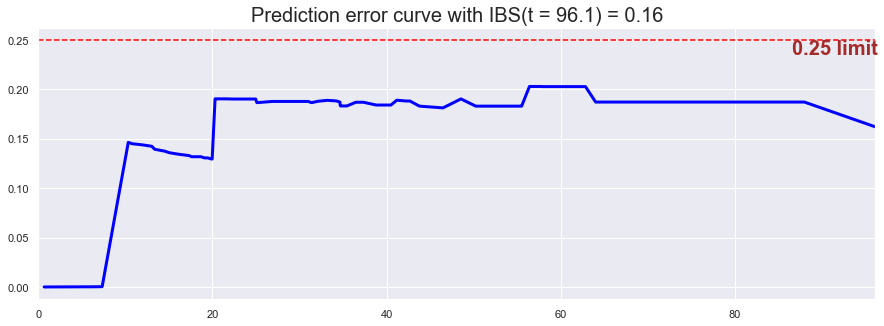

IBS: 0.16

 4 of kfold 10
C-index: 0.83


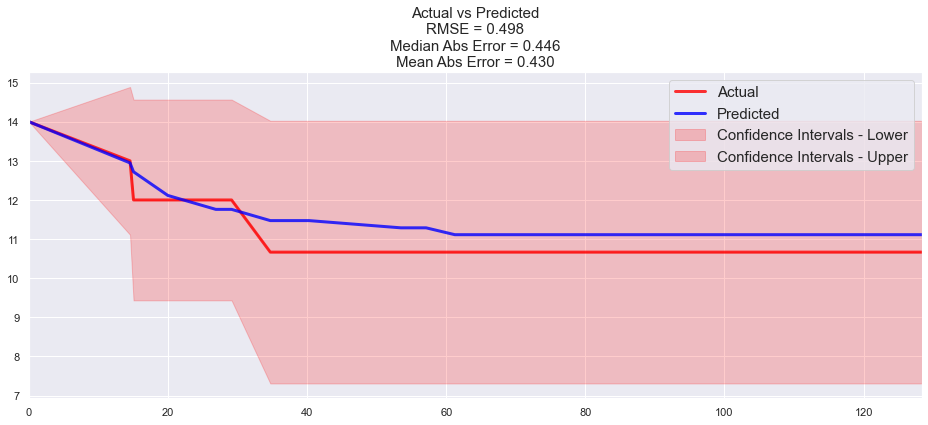

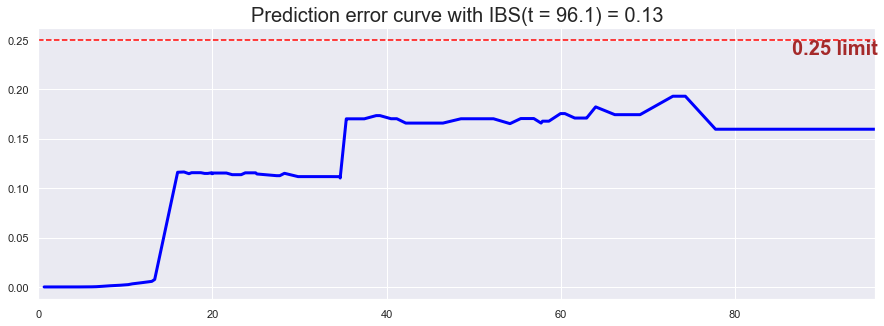

IBS: 0.13

 5 of kfold 10
C-index: 0.78


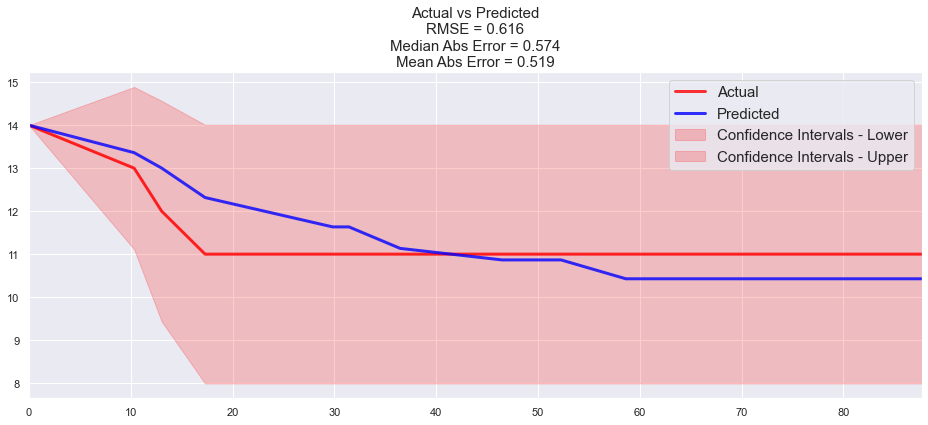

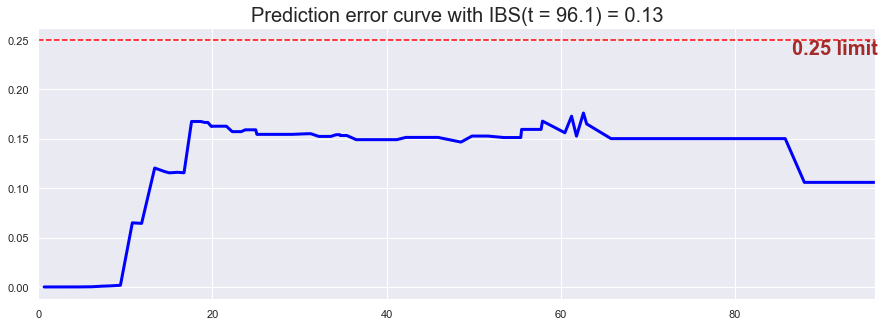

IBS: 0.13

 6 of kfold 10
C-index: 0.76


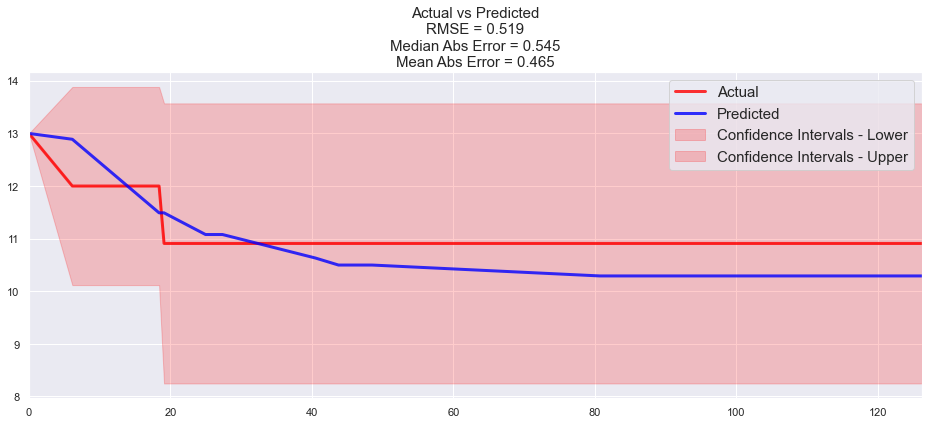

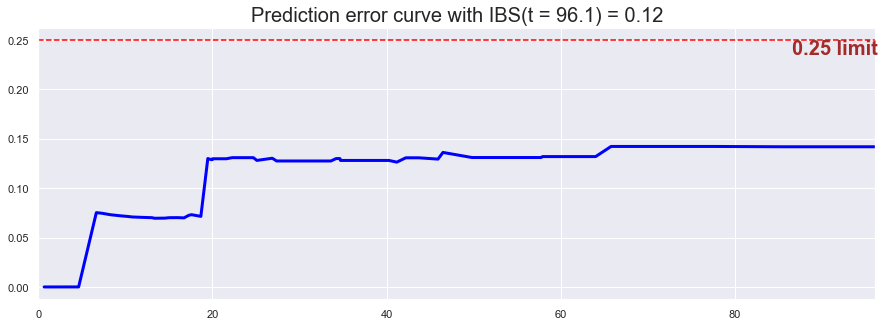

IBS: 0.12

 7 of kfold 10
C-index: 0.83


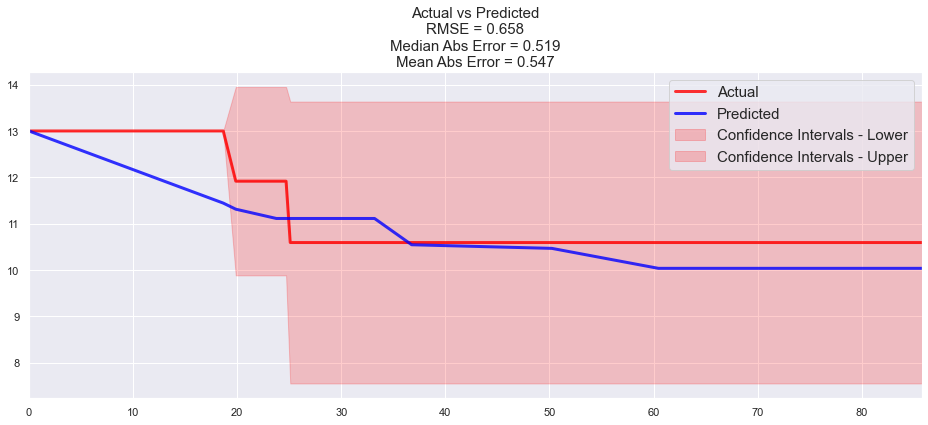

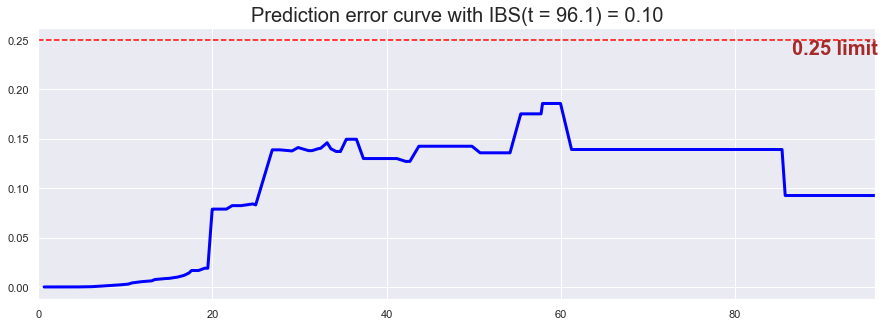

IBS: 0.10

 8 of kfold 10
C-index: 0.59


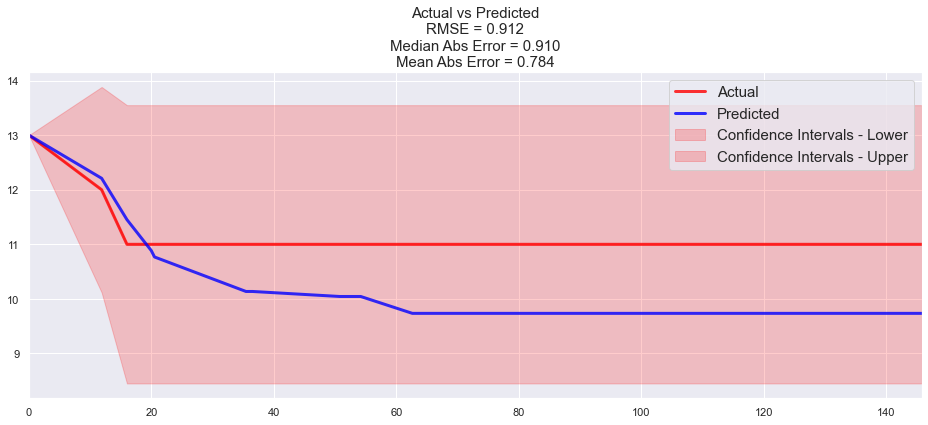

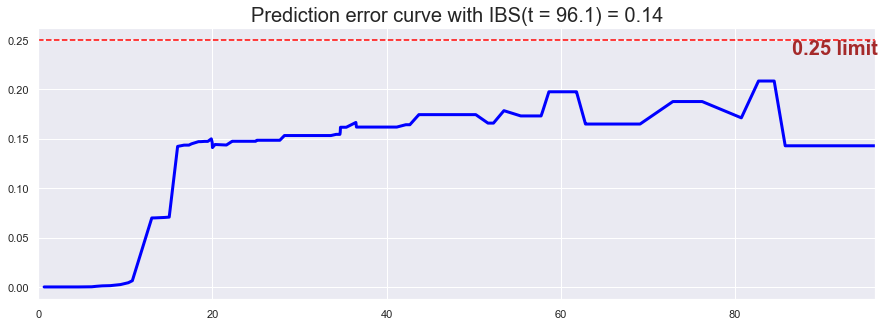

IBS: 0.14

 9 of kfold 10
C-index: 0.58


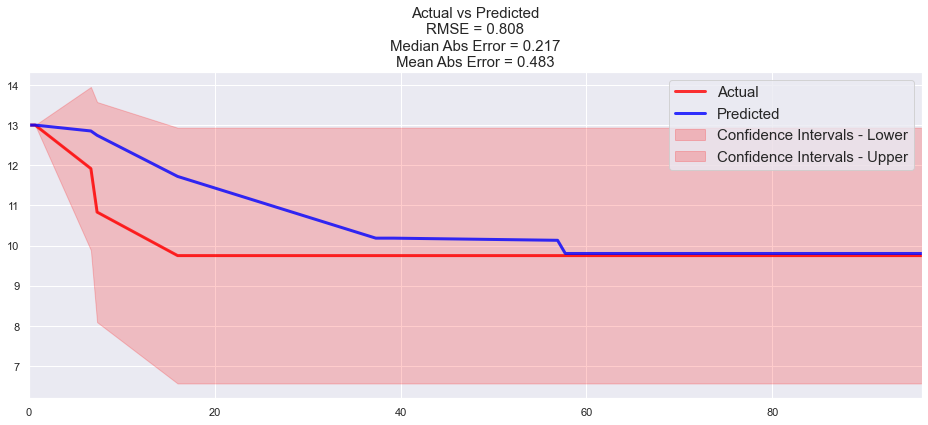

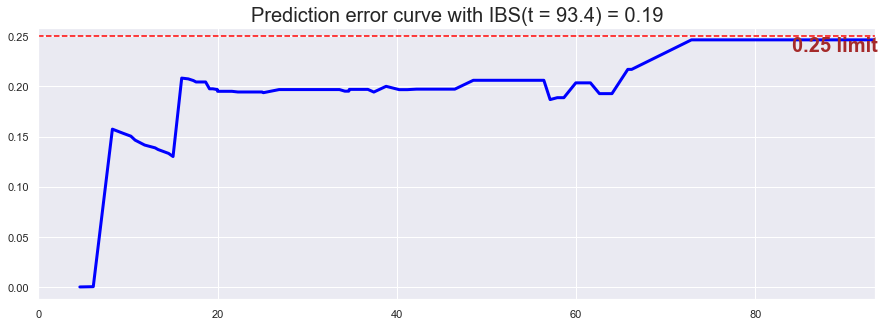

IBS: 0.19

 10 of kfold 10
C-index: 0.58


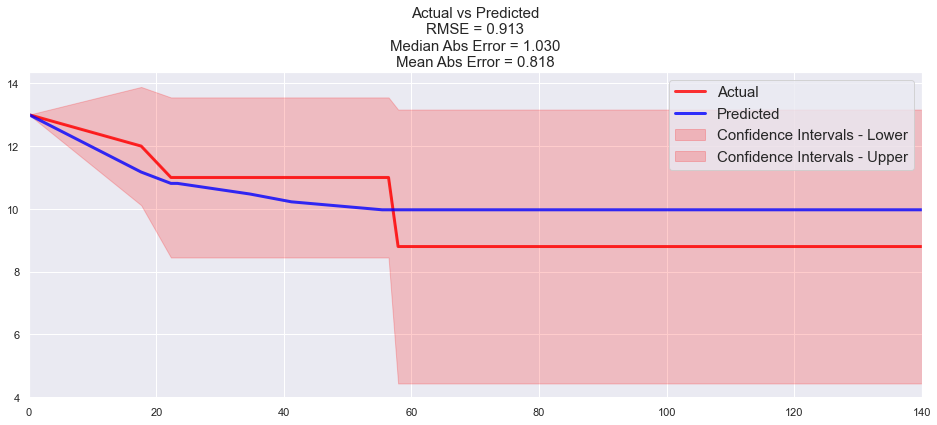

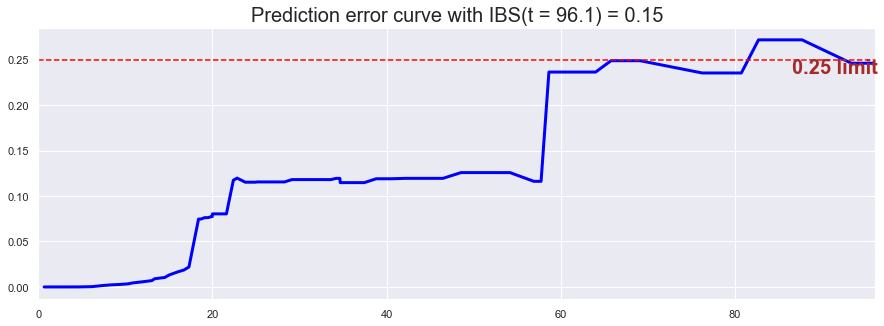

IBS: 0.15


In [24]:
#the random tree variables need to be fine tuned using loops because 
#the grid search CV is not compatible with the PySurvival package

from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import compare_to_actual
from pysurvival.utils.display import integrated_brier_score
i=1
kf=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in kf.split(Xnew,Enew):
    print('\n {} of kfold {}'.format(i,kf.n_splits)) 
    X1_train, X1_test=Xnew.loc[train_index], Xnew.loc[test_index]
    X_train, X_test=X1_train[features2], X1_test[features2]
    T_train, T_test=X1_train['time column'].values, X1_test['time column'].values
    E_train, E_test=Enew.loc[train_index].values, Enew.loc[test_index].values
    xst = RandomSurvivalForestModel(num_trees=10) 
    xst.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = 1,
        min_node_size = 2, num_threads = -1, 
        sample_size_pct = 0.63, importance_mode = 'normalized_permutation',
        seed = None, save_memory=False )
    c_index = concordance_index(xst, X_test, T_test, E_test)
    print('C-index: {:.2f}'.format(c_index))
    results = compare_to_actual(xst, X_test, T_test, E_test, is_at_risk = True,  figure_size=(16, 6), 
                                metrics = ['rmse', 'mean', 'median'])
    ibs = integrated_brier_score(xst, X_test, T_test, E_test, t_max=100, figure_size=(15,5))
    print('IBS: {:.2f}'.format(ibs))
    i=i+1

#### Below is an example on how to perform a grid search for the optimal RF parameters

In [25]:
num_tree=(10, 15, 20, 50, 100, 200)
max_depth=(1, 3, 5, 7, 9, 10, 20)
min_node=(2, 5, 10, 15, 20)


In [26]:
# this script searches the RF paramters listed in the cell 29
#prints out the average of 10 K Fold concordance
from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from statistics import mean 

for a in num_tree:
    for b in max_depth:
        for c in min_node:
            cc=[]
            kf=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
            i=1
            for train_index, test_index in kf.split(Xnew,Enew):
                X1_train, X1_test=Xnew.loc[train_index], Xnew.loc[test_index]
                X_train, X_test=X1_train[features2], X1_test[features2]
                T_train, T_test=X1_train['time column'].values, X1_test['time column'].values
                E_train, E_test=Enew.loc[train_index].values, Enew.loc[test_index].values
                xst = RandomSurvivalForestModel(num_trees=a) 
                xst.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = b,
                min_node_size = c, num_threads = -1, 
                sample_size_pct = 0.63, importance_mode = 'normalized_permutation',
                seed = None, save_memory=False )
                from pysurvival.utils.metrics import concordance_index
                c_index = concordance_index(xst, X_test, T_test, E_test)
                cc.append(c_index)
                i=i+1
            print(a,b, c, mean(cc))
                 

10 1 2 0.6486358038236146
10 1 5 0.6841230770144733
10 1 10 0.6894965613325752
10 1 15 0.7194863673007577
10 1 20 0.7174077437783177
10 3 2 0.6247484550841497
10 3 5 0.7015140010642414
10 3 10 0.6509245953085551
10 3 15 0.6455738639421271
10 3 20 0.6293955360560008
10 5 2 0.6843392990011942
10 5 5 0.6766287537315199
10 5 10 0.676441464014675
10 5 15 0.679055733053508
10 5 20 0.6907782309551873
10 7 2 0.652597432307792
10 7 5 0.6110474446413172
10 7 10 0.7260619418105654
10 7 15 0.6762746774865083
10 7 20 0.6642232928435909
10 9 2 0.6333192639790987
10 9 5 0.6673475075111241
10 9 10 0.7034834986846079
10 9 15 0.6841800166776503
10 9 20 0.6919465467865885
10 10 2 0.6856074178426401
10 10 5 0.6921825263468053
10 10 10 0.6889664564611793
10 10 15 0.646171322872043
10 10 20 0.6980518041655502
10 20 2 0.6631457807239111
10 20 5 0.6560239657159479
10 20 10 0.7002384246601131
10 20 15 0.6440234127793749
10 20 20 0.6337066996869869
15 1 2 0.6770844041689101
15 1 5 0.660108885241726
15 1 10 0.64